In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()
file=next(iter(uploaded))
df=pd.read_csv('unclean_smartwatch_health_data.csv')
df.head()

Saving unclean_smartwatch_health_data.csv to unclean_smartwatch_health_data.csv


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.0,58.939776,98.809650,5450.390578,7.167235622316564,Highly Active,1
1,NaN,NaN,98.532195,727.601610,6.538239375570314,Highly_Active,5
2,1860.0,247.803052,97.052954,2826.521994,ERROR,Highly Active,5
3,2294.0,40.000000,96.894213,13797.338044,7.367789630207228,Actve,3
4,2130.0,61.950165,98.583797,15679.067648,NaN,Highly_Active,6


In [3]:
df=df.dropna()
df

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.0,58.939776,98.809650,5450.390578,7.167235622316564,Highly Active,1
2,1860.0,247.803052,97.052954,2826.521994,ERROR,Highly Active,5
3,2294.0,40.000000,96.894213,13797.338044,7.367789630207228,Actve,3
5,2095.0,96.285938,94.202910,10205.992256,8.378342673824589,Highly_Active,10
6,4772.0,47.272257,95.389760,3208.781177,7.871146008904113,Seddentary,2
...,...,...,...,...,...,...,...
9994,1942.0,77.912299,98.640583,10061.145291,5.428634630125767,Seddentary,10
9995,1524.0,78.819386,98.931927,2948.491953,7.402748595032027,Active,7
9996,4879.0,48.632659,95.773035,4725.623070,6.3821659358529015,Sedentary,2
9997,2624.0,73.834442,97.945874,2571.492060,6.91654920303435,Sedentary,4


In [4]:
df=df[df['Sleep Duration (hours)'] !='ERROR']
df

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.0,58.939776,98.809650,5450.390578,7.167235622316564,Highly Active,1
3,2294.0,40.000000,96.894213,13797.338044,7.367789630207228,Actve,3
5,2095.0,96.285938,94.202910,10205.992256,8.378342673824589,Highly_Active,10
6,4772.0,47.272257,95.389760,3208.781177,7.871146008904113,Seddentary,2
7,4092.0,81.733497,95.981343,6051.249857,5.224139066195455,Sedentary,1
...,...,...,...,...,...,...,...
9994,1942.0,77.912299,98.640583,10061.145291,5.428634630125767,Seddentary,10
9995,1524.0,78.819386,98.931927,2948.491953,7.402748595032027,Active,7
9996,4879.0,48.632659,95.773035,4725.623070,6.3821659358529015,Sedentary,2
9997,2624.0,73.834442,97.945874,2571.492060,6.91654920303435,Sedentary,4


In [5]:
df.reset_index(drop=True, inplace=True)
df

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.0,58.939776,98.809650,5450.390578,7.167235622316564,Highly Active,1
1,2294.0,40.000000,96.894213,13797.338044,7.367789630207228,Actve,3
2,2095.0,96.285938,94.202910,10205.992256,8.378342673824589,Highly_Active,10
3,4772.0,47.272257,95.389760,3208.781177,7.871146008904113,Seddentary,2
4,4092.0,81.733497,95.981343,6051.249857,5.224139066195455,Sedentary,1
...,...,...,...,...,...,...,...
8320,1942.0,77.912299,98.640583,10061.145291,5.428634630125767,Seddentary,10
8321,1524.0,78.819386,98.931927,2948.491953,7.402748595032027,Active,7
8322,4879.0,48.632659,95.773035,4725.623070,6.3821659358529015,Sedentary,2
8323,2624.0,73.834442,97.945874,2571.492060,6.91654920303435,Sedentary,4


In [6]:
def handle_error(value):
  if (value=='Highly_Active'):
    return 'Highly Active'
  elif(value=='Seddentary'):
    return 'Sedentary'
  elif(value=='Actve'):
    return 'Active'
  else:
    return value
df['Activity Level'] = df['Activity Level'].apply(handle_error)
df


<ipython-input-6-72af248aa638>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Activity Level'] = df['Activity Level'].apply(handle_error)


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.0,58.939776,98.809650,5450.390578,7.167235622316564,Highly Active,1
1,2294.0,40.000000,96.894213,13797.338044,7.367789630207228,Active,3
2,2095.0,96.285938,94.202910,10205.992256,8.378342673824589,Highly Active,10
3,4772.0,47.272257,95.389760,3208.781177,7.871146008904113,Sedentary,2
4,4092.0,81.733497,95.981343,6051.249857,5.224139066195455,Sedentary,1
...,...,...,...,...,...,...,...
8320,1942.0,77.912299,98.640583,10061.145291,5.428634630125767,Sedentary,10
8321,1524.0,78.819386,98.931927,2948.491953,7.402748595032027,Active,7
8322,4879.0,48.632659,95.773035,4725.623070,6.3821659358529015,Sedentary,2
8323,2624.0,73.834442,97.945874,2571.492060,6.91654920303435,Sedentary,4


In [7]:
df['Activity Level'].unique()

array(['Highly Active', 'Active', 'Sedentary'], dtype=object)

In [8]:

df.drop(columns=['User ID'])

,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,58.939776,98.809650,5450.390578,7.167235622316564,Highly Active,1
1,40.000000,96.894213,13797.338044,7.367789630207228,Active,3
2,96.285938,94.202910,10205.992256,8.378342673824589,Highly Active,10
3,47.272257,95.389760,3208.781177,7.871146008904113,Sedentary,2
4,81.733497,95.981343,6051.249857,5.224139066195455,Sedentary,1
...,...,...,...,...,...,...
8320,77.912299,98.640583,10061.145291,5.428634630125767,Sedentary,10
8321,78.819386,98.931927,2948.491953,7.402748595032027,Active,7
8322,48.632659,95.773035,4725.623070,6.3821659358529015,Sedentary,2
8323,73.834442,97.945874,2571.492060,6.91654920303435,Sedentary,4


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8325 entries, 0 to 8324
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User ID                 8325 non-null   float64
 1   Heart Rate (BPM)        8325 non-null   float64
 2   Blood Oxygen Level (%)  8325 non-null   float64
 3   Step Count              8325 non-null   float64
 4   Sleep Duration (hours)  8325 non-null   object 
 5   Activity Level          8325 non-null   object 
 6   Stress Level            8325 non-null   object 
dtypes: float64(4), object(3)
memory usage: 455.4+ KB


In [10]:
df['Sleep Duration (hours)'].unique()

array(['7.167235622316564', '7.367789630207228', '8.378342673824589', ...,
       '6.3821659358529015', '6.91654920303435', '5.691001039740254'],
      dtype=object)

In [11]:
df['Sleep Duration (hours)'].isnull().sum()

np.int64(0)

In [12]:
df['Sleep Duration (hours)']=pd.to_numeric(df['Sleep Duration (hours)'],errors='coerce')

<ipython-input-12-7ee31c891942>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sleep Duration (hours)']=pd.to_numeric(df['Sleep Duration (hours)'],errors='coerce')


In [13]:
df['Sleep Duration (hours)'].unique()

array([7.16723562, 7.36778963, 8.37834267, ..., 6.38216594, 6.9165492 ,
       5.69100104])

In [14]:
df['Sleep Duration (hours)']=df['Sleep Duration (hours)'].round()

<ipython-input-14-c4e2eeec7459>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sleep Duration (hours)']=df['Sleep Duration (hours)'].round()


In [15]:
df['Sleep Duration (hours)'].unique()

array([ 7.,  8.,  5.,  6.,  9.,  4.,  3., 10., 11., 12.,  2.,  1., -0.])

In [16]:
df['Stress Level'].isnull().sum()
df['Stress Level'].unique()


array(['1', '3', '10', '2', '8', '5', '9', 'Very High', '7', '6', '4'],
      dtype=object)

In [17]:
df['Stress Level']=pd.to_numeric(df['Stress Level'],errors='coerce')
df['Stress Level'].unique()

<ipython-input-17-081bd990806e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Stress Level']=pd.to_numeric(df['Stress Level'],errors='coerce')


array([ 1.,  3., 10.,  2.,  8.,  5.,  9., nan,  7.,  6.,  4.])

In [18]:
df['Stress Level']=df['Stress Level'].fillna(df['Stress Level'].mean())

<ipython-input-18-9f2604b6e81a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Stress Level']=df['Stress Level'].fillna(df['Stress Level'].mean())


In [19]:
df['Stress Level'].unique()

array([ 1.        ,  3.        , 10.        ,  2.        ,  8.        ,
        5.        ,  9.        ,  5.43369132,  7.        ,  6.        ,
        4.        ])

In [20]:
df['Stress Level'].round()

,Stress Level
0,1.0
1,3.0
2,10.0
3,2.0
4,1.0
...,...
8320,10.0
8321,7.0
8322,2.0
8323,4.0


In [21]:
df['Step Count'].unique()
df['Step Count'].isnull().sum()
df['Step Count'].round()


,Step Count
0,5450.0
1,13797.0
2,10206.0
3,3209.0
4,6051.0
...,...
8320,10061.0
8321,2948.0
8322,4726.0
8323,2571.0


In [22]:
df['Blood Oxygen Level (%)'].isnull().sum()
df['Blood Oxygen Level (%)'].unique()
df['Blood Oxygen Level (%)'].round()

,Blood Oxygen Level (%)
0,99.0
1,97.0
2,94.0
3,95.0
4,96.0
...,...
8320,99.0
8321,99.0
8322,96.0
8323,98.0


In [23]:
df['Heart Rate (BPM)'].isnull().sum()
df['Heart Rate (BPM)'].unique()
df['Heart Rate (BPM)'].round()

,Heart Rate (BPM)
0,59.0
1,40.0
2,96.0
3,47.0
4,82.0
...,...
8320,78.0
8321,79.0
8322,49.0
8323,74.0


In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8325 entries, 0 to 8324
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User ID                 8325 non-null   float64
 1   Heart Rate (BPM)        8325 non-null   float64
 2   Blood Oxygen Level (%)  8325 non-null   float64
 3   Step Count              8325 non-null   float64
 4   Sleep Duration (hours)  8325 non-null   float64
 5   Activity Level          8325 non-null   object 
 6   Stress Level            8325 non-null   float64
dtypes: float64(6), object(1)
memory usage: 455.4+ KB


<Axes: >

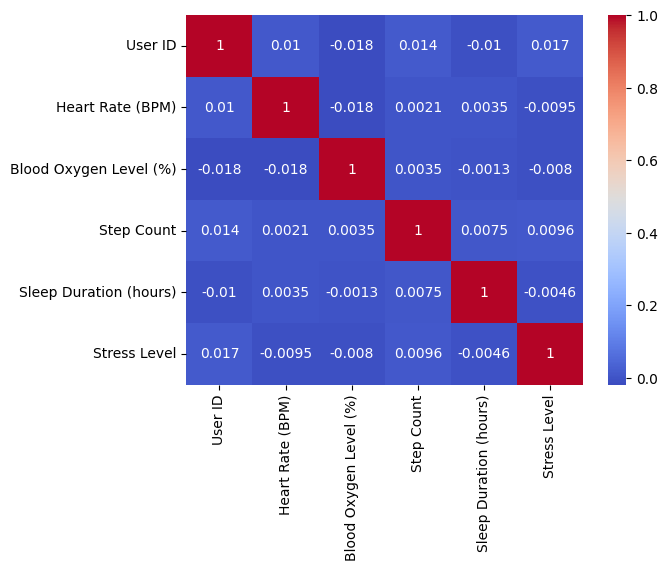

In [25]:
df1=df.select_dtypes(include='float')
sns.heatmap(df1.corr(),cmap='coolwarm',annot=True)

<Axes: xlabel='Activity Level', ylabel='Stress Level'>

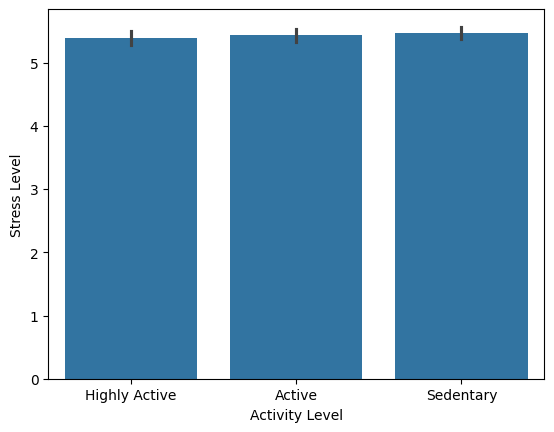

In [28]:
df = df.sort_values('Stress Level')
sns.barplot(x='Activity Level', y='Stress Level', data=df)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, '(-0.0, 1.0]'),
  Text(1, 0, '(1.0, 2.0]'),
  Text(2, 0, '(2.0, 3.0]'),
  Text(3, 0, '(3.0, 4.0]'),
  Text(4, 0, '(4.0, 5.0]'),
  Text(5, 0, '(5.0, 6.0]'),
  Text(6, 0, '(6.0, 7.0]'),
  Text(7, 0, '(7.0, 8.0]'),
  Text(8, 0, '(8.0, 9.0]'),
  Text(9, 0, '(9.0, 10.0]'),
  Text(10, 0, '(10.0, 11.0]'),
  Text(11, 0, '(11.0, 12.0]')])

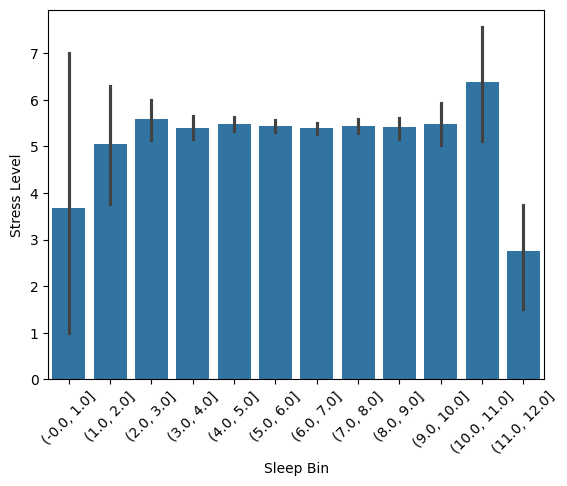

In [29]:
bins = np.arange(df['Sleep Duration (hours)'].min(), df['Sleep Duration (hours)'].max() + 1, 1)
df['Sleep Bin'] = pd.cut(df['Sleep Duration (hours)'], bins)
df = df.sort_values('Sleep Bin')
sns.barplot(x='Sleep Bin', y='Stress Level', data=df)
plt.xticks(rotation=45)

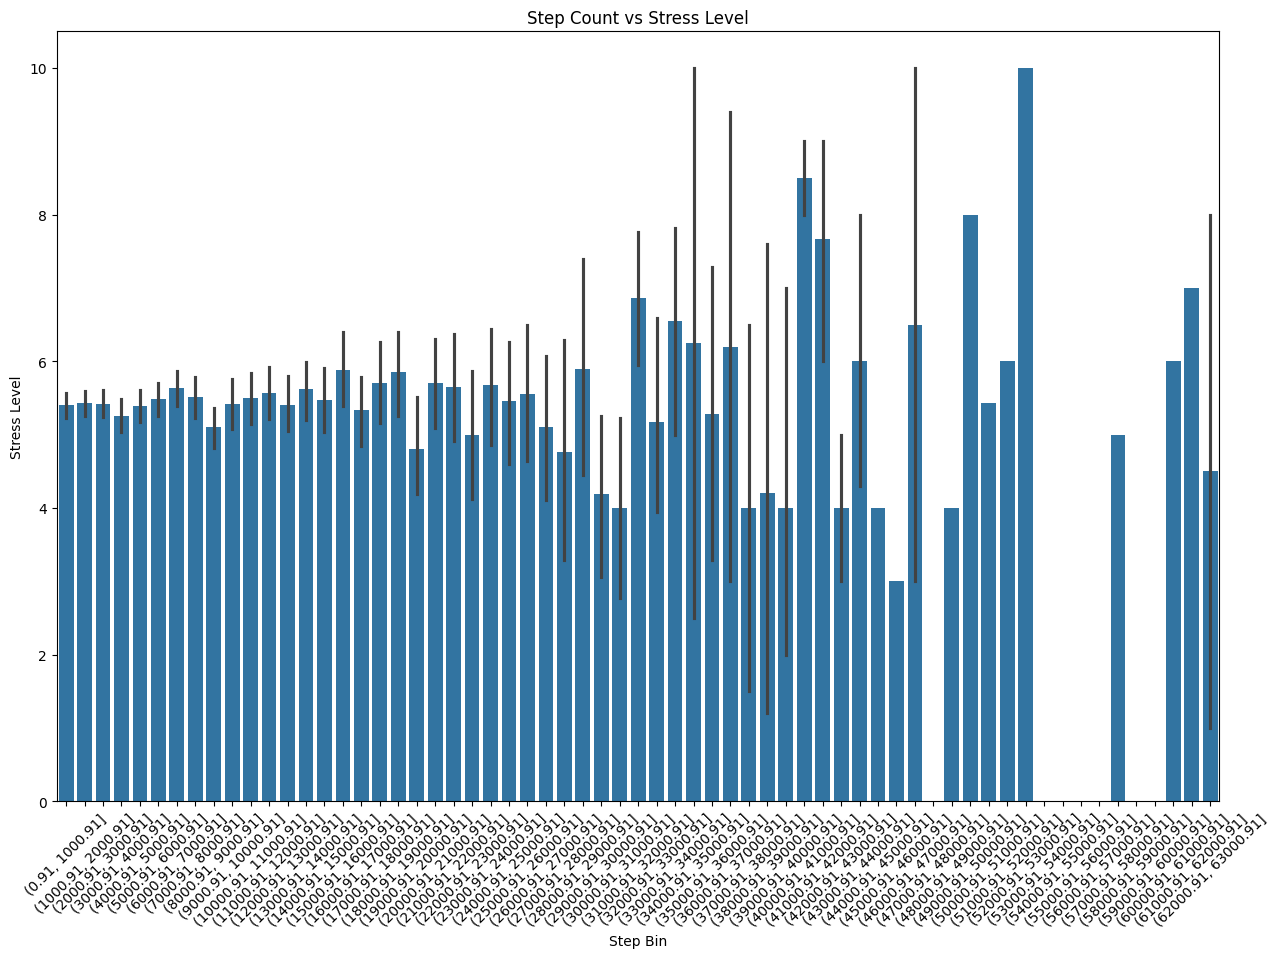

In [30]:
step_bins = np.arange(df['Step Count'].min(), df['Step Count'].max() + 1000, 1000)
df['Step Bin'] = pd.cut(df['Step Count'], step_bins)
plt.figure(figsize=(15, 10))
sns.barplot(x='Step Bin', y='Stress Level', data=df)
plt.xticks(rotation=45)
plt.title("Step Count vs Stress Level")
plt.xlabel("Step Bin")
plt.ylabel("Stress Level")
plt.show()

<Axes: xlabel='Activity Level', ylabel='count'>

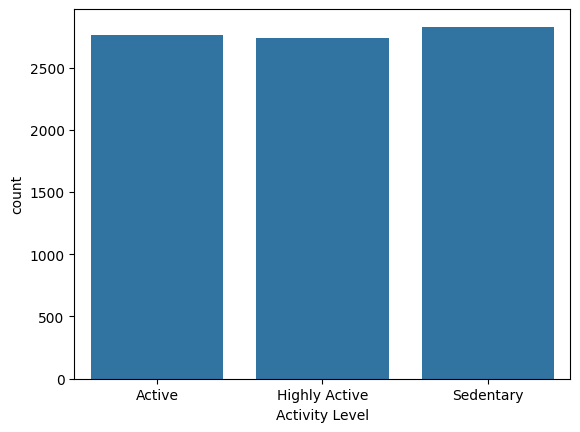

In [31]:
sns.countplot(x='Activity Level',data=df)


<Axes: xlabel='Activity Level', ylabel='Stress Level'>

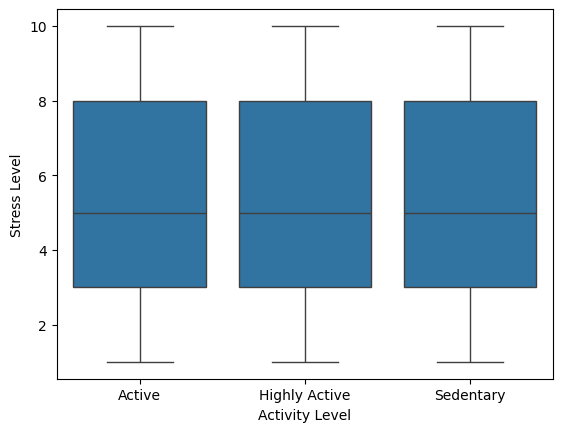

In [32]:

sns.boxplot(x='Activity Level',y='Stress Level',data=df)

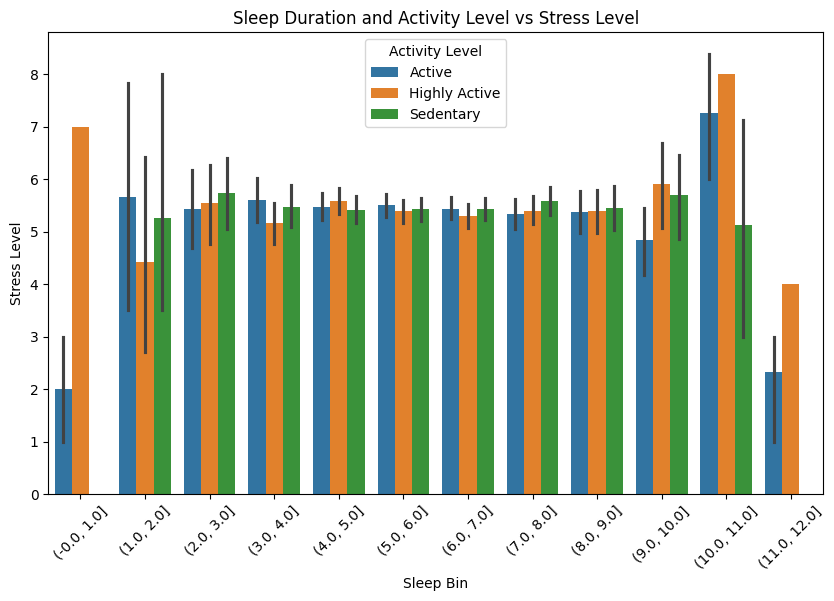

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Sleep Bin', y='Stress Level', hue='Activity Level', data=df)
plt.title('Sleep Duration and Activity Level vs Stress Level')
plt.xticks(rotation=45)
plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41],
 [Text(0, 0, '(0.91, 1500.91]'),
  Text(1, 0, '(1500.91, 3000.91]'),
  Text(2, 0, '(3000.91, 4500.91]'),
  Text(3, 0, '(4500.91, 6000.91]'),
  Text(4, 0, '(6000.91, 7500.91]'),
  Text(5, 0, '(7500.91, 9000.91]'),
  Text(6, 0, '(9000.91, 10500.91]'),
  Text(7, 0, '(10500.91, 12000.91]'),
  Text(8, 0, '(12000.91, 13500.91]'),
  Text(9, 0, '(13500.91, 15000.91]'),
  Text(10, 0, '(15000.91, 16500.91]'),
  Text(11, 0, '(16500.91, 18000.91]'),
  Text(12, 0, '(18000.91, 19500.91]'),
  Text(13, 0, '(19500.91, 21000.91]'),
  Text(14, 0, '(21000.91, 22500.91]'),
  Text(15, 0, '(22500.91, 24000.91]'),
  Text(16, 0, '(24000.91, 25500.91]'),
  Text(17, 0, '(25500.91, 27000.91]'),
  Text(18, 0, '(27000.91, 28500.91]'),
  Text(19, 0, '(28500.91, 30000.91]'),
  T

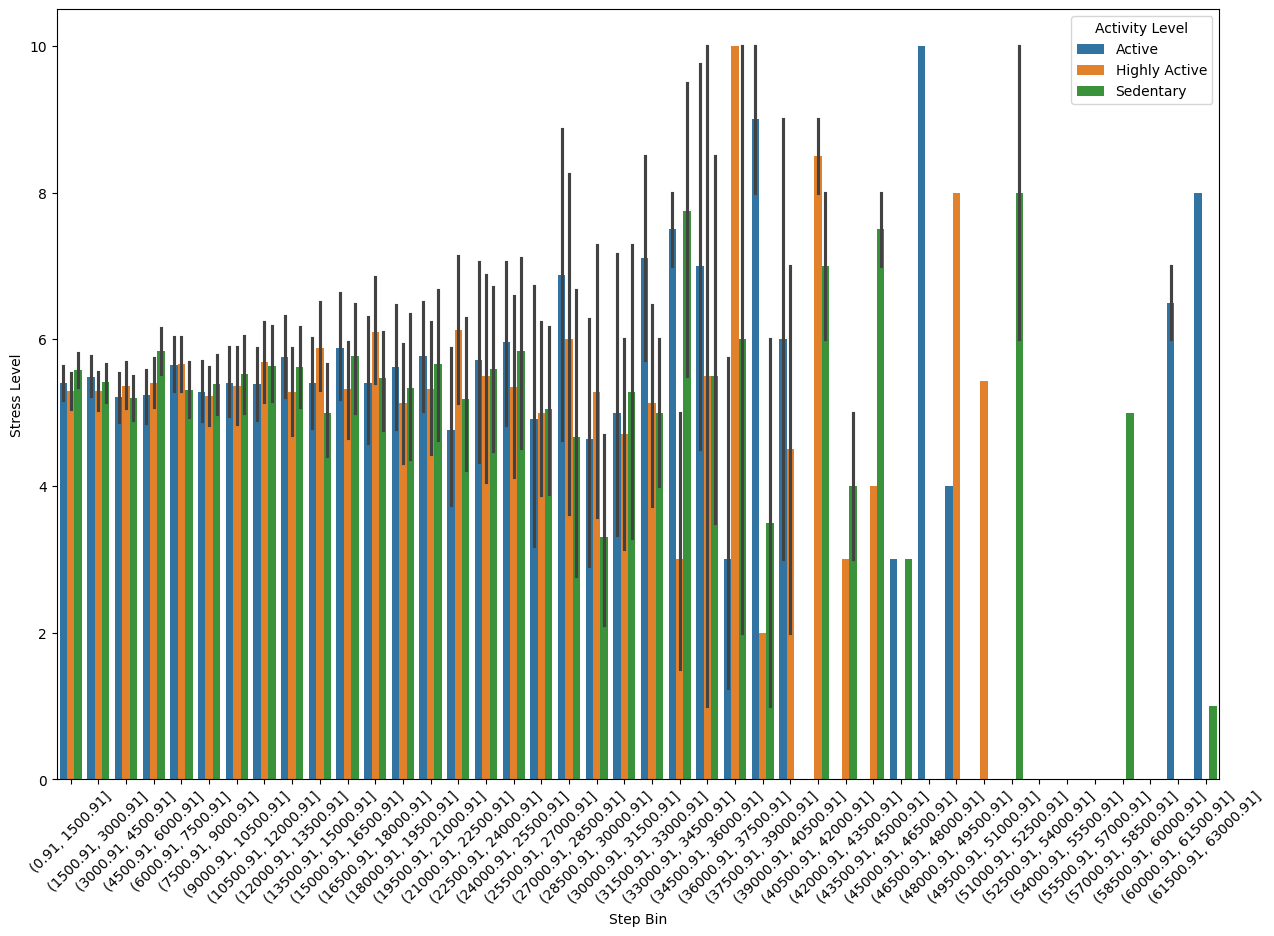

In [50]:
bin=np.arange(df['Step Count'].min(), df['Step Count'].max() +1500, 1500)
df['Step Bin']=pd.cut(df['Step Count'],bin)
plt.figure(figsize=(15,10))
sns.barplot(x="Step Bin", y="Stress Level", hue="Activity Level",data=df)
plt.xticks(rotation=45)

In [114]:
df1=df.groupby(['Step Bin','Sleep Bin','Activity Level'])['Stress Level'].mean().reset_index()
df1

<ipython-input-114-0b4512d96493>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1=df.groupby(['Step Bin','Sleep Bin','Activity Level'])['Stress Level'].mean().reset_index()


,Step Bin,Sleep Bin,Activity Level,Stress Level
0,"(0.91, 1500.91]","(-0.0, 1.0]",Active,1.0
1,"(0.91, 1500.91]","(-0.0, 1.0]",Highly Active,NaN
2,"(0.91, 1500.91]","(-0.0, 1.0]",Sedentary,NaN
3,"(0.91, 1500.91]","(1.0, 2.0]",Active,NaN
4,"(0.91, 1500.91]","(1.0, 2.0]",Highly Active,NaN
...,...,...,...,...
1507,"(61500.91, 63000.91]","(10.0, 11.0]",Highly Active,NaN
1508,"(61500.91, 63000.91]","(10.0, 11.0]",Sedentary,NaN
1509,"(61500.91, 63000.91]","(11.0, 12.0]",Active,NaN
1510,"(61500.91, 63000.91]","(11.0, 12.0]",Highly Active,NaN


([<matplotlib.axis.XTick at 0x7ac04f89dc50>,
 [Text(0, 0, '0-1500 | 0-1'),
  Text(10, 0, '0-1500 | 10-11'),
  Text(20, 0, '1500-3000 | 8-9'),
  Text(30, 0, '3000-4500 | 6-7'),
  Text(40, 0, '4500-6000 | 4-5'),
  Text(50, 0, '6000-7500 | 2-3'),
  Text(60, 0, '7500-9000 | 0-1'),
  Text(70, 0, '7500-9000 | 10-11'),
  Text(80, 0, '9000-10500 | 8-9'),
  Text(90, 0, '10500-12000 | 6-7'),
  Text(100, 0, '12000-13500 | 4-5'),
  Text(110, 0, '13500-15000 | 2-3'),
  Text(120, 0, '15000-16500 | 0-1'),
  Text(130, 0, '15000-16500 | 10-11'),
  Text(140, 0, '16500-18000 | 8-9'),
  Text(150, 0, '18000-19500 | 6-7'),
  Text(160, 0, '19500-21000 | 4-5'),
  Text(170, 0, '21000-22500 | 2-3'),
  Text(180, 0, '22500-24000 | 0-1'),
  Text(190, 0, '22500-24000 | 10-11'),
  Text(200, 0, '24000-25500 | 8-9'),
  Text(210, 0, '25500-27000 | 6-7'),
  Text(220, 0, '27000-28500 | 4-5'),
  Text(230, 0, '28500-30000 | 2-3'),
  Text(240, 0, '30000-31500 | 0-1'),
  Text(250, 0, '30000-31500 | 10-11'),
  Text(260, 0, '3

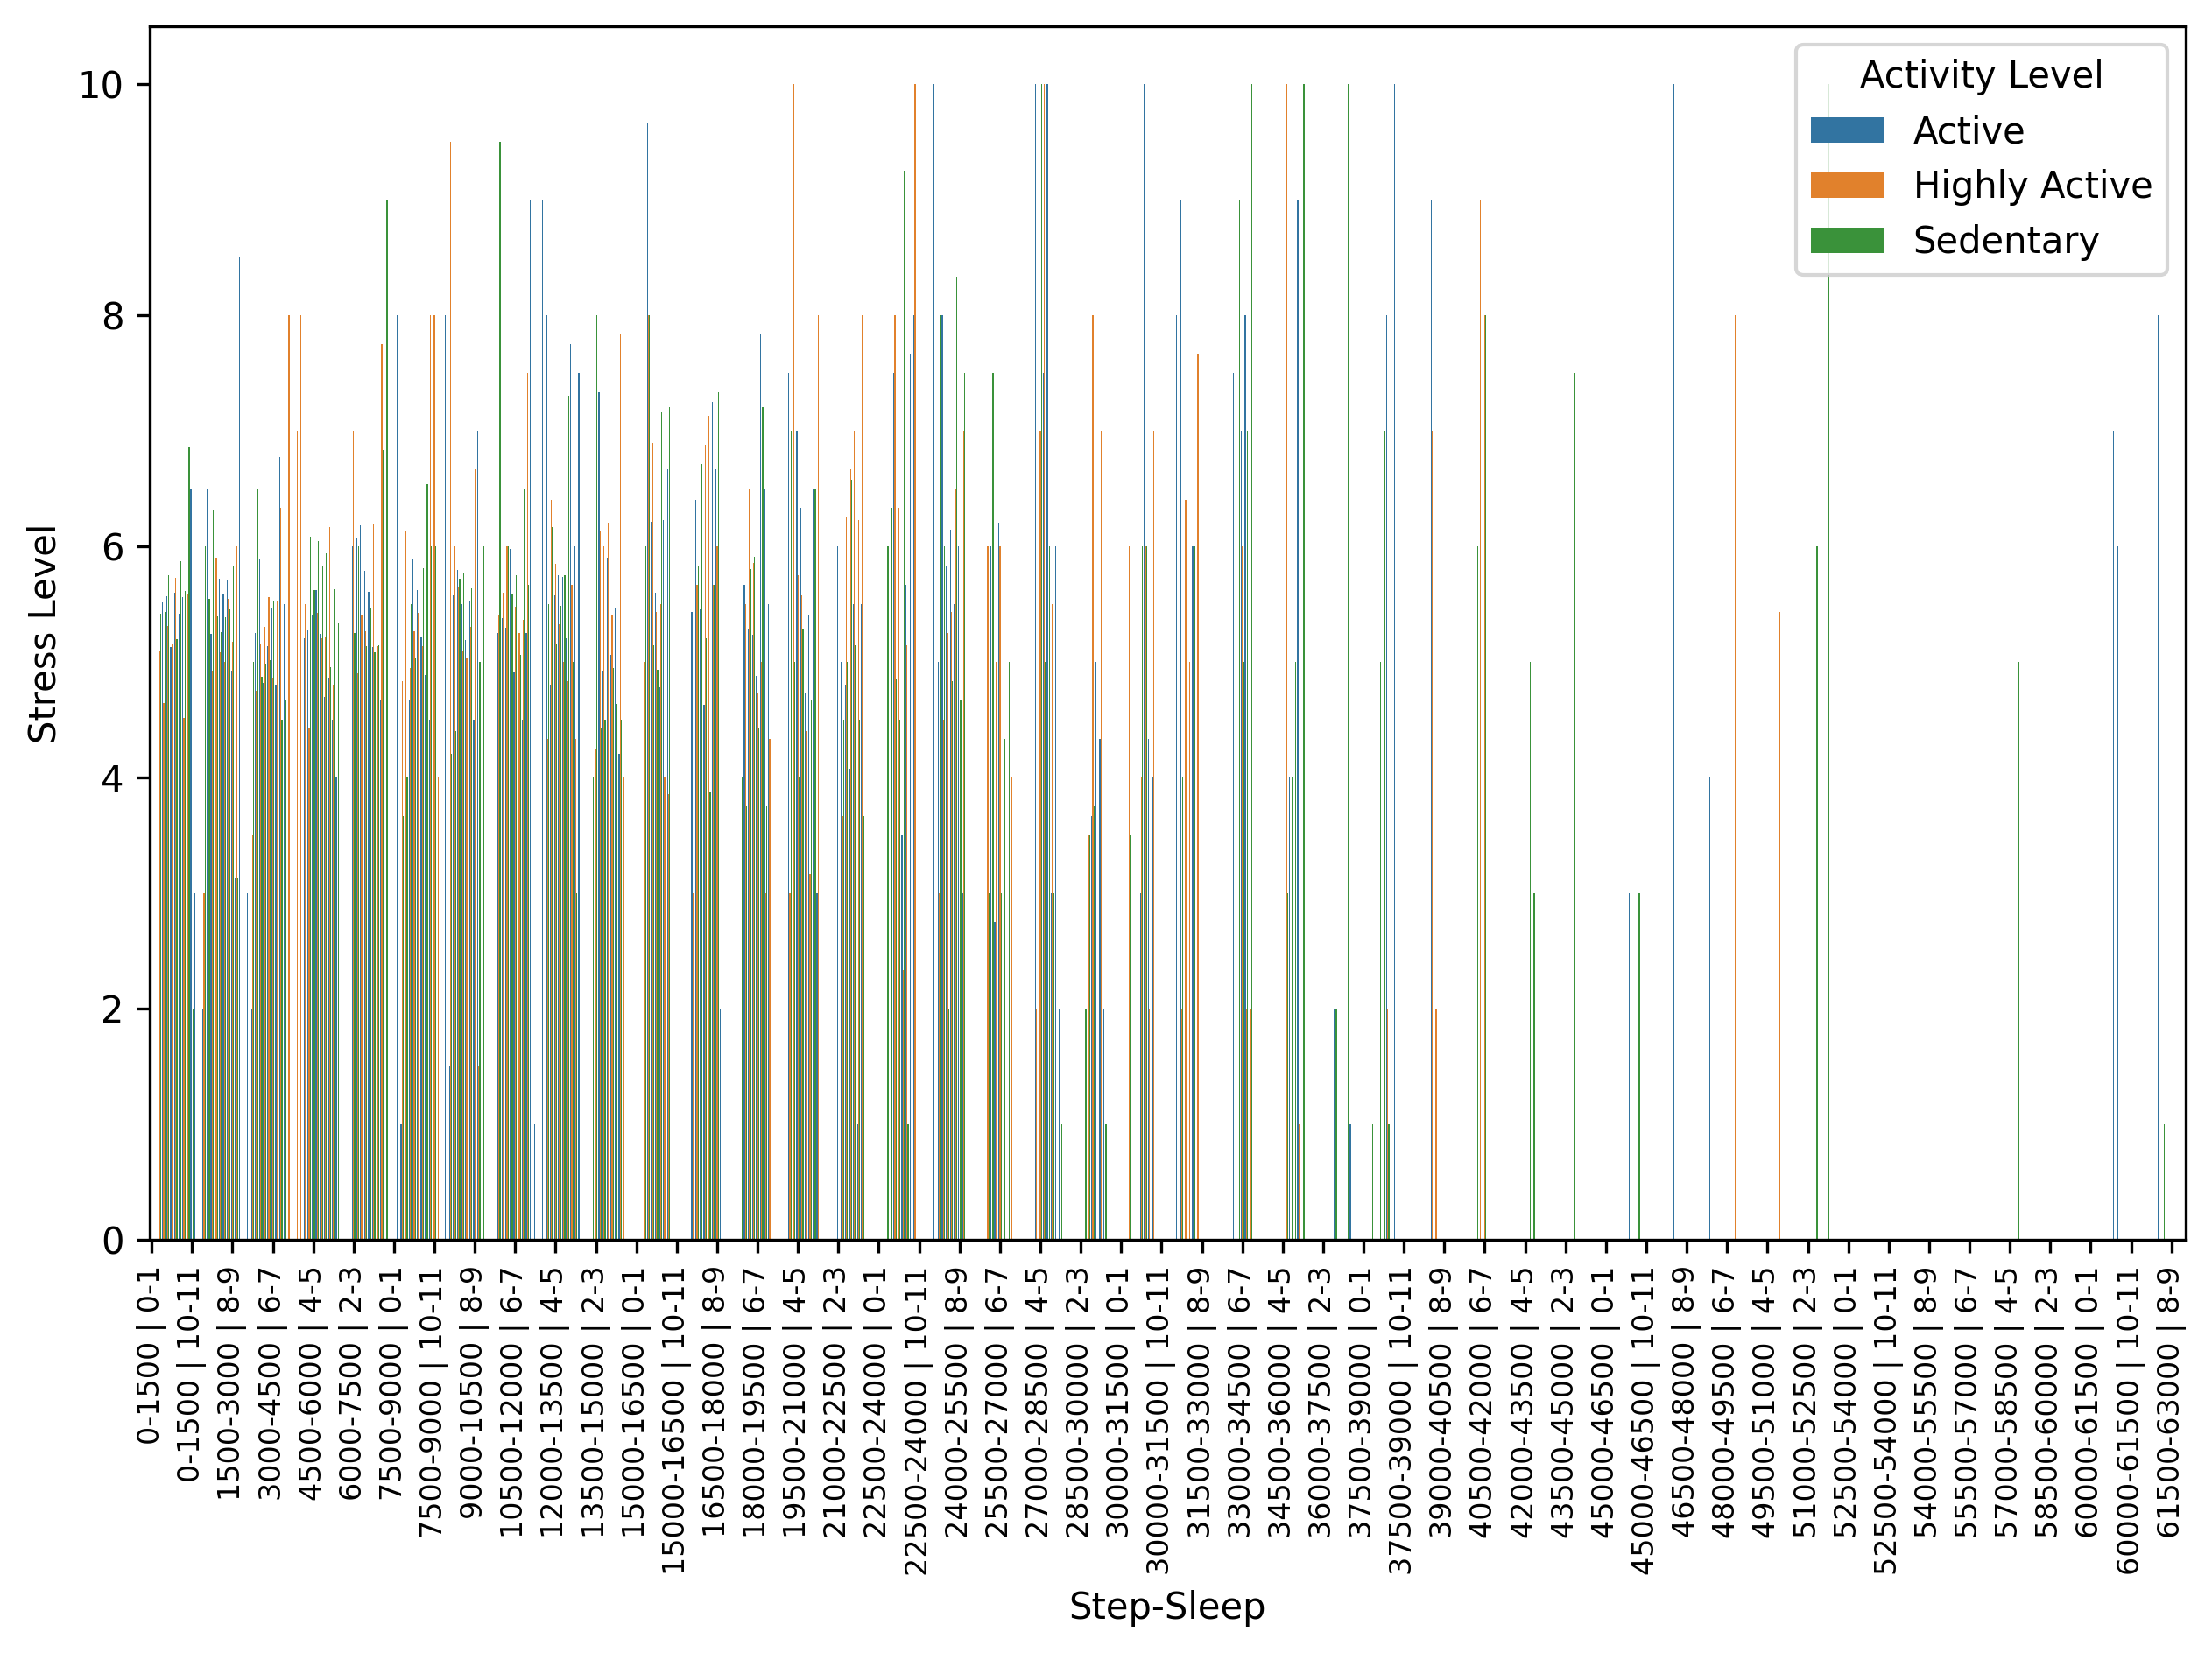

In [121]:
plt.figure(figsize=(10,6),dpi=300)
df1['Step Bin Label'] = df1['Step Bin'].apply(lambda x: f"{int(x.left)}-{int(x.right)}")
df1['Sleep Bin Label'] = df1['Sleep Bin'].apply(lambda x: f"{int(x.left)}-{int(x.right)}")
df1['Step-Sleep'] = df1['Step Bin Label'].astype(str) + ' | ' + df1['Sleep Bin Label'].astype(str)
sns.barplot(x='Step-Sleep', y='Stress Level', hue='Activity Level', data=df1)
plt.xticks(ticks=range(0, len(df1['Step-Sleep'].unique()), 10), rotation=90, fontsize=8)
